In [1]:
#initial imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#import dataset
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory=False)
#get shape
df.shape

(364558, 53)

In [3]:
#get head
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
#identify variables with null values
df.isna().sum(axis=0)

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [5]:
#missing value treatment by removing all cols with >75% missing values
df = df.loc[:, df.isna().sum() < 0.75*df.shape[0]]

In [6]:
#check that certain cols are removed
df.isna().sum(axis=0)

Unique Key                            0
Created Date                          0
Closed Date                        2381
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         6501
Location Type                       133
Incident Zip                       2998
Incident Address                  51699
Street Name                       51699
Cross Street 1                    57188
Cross Street 2                    57805
Address Type                       3252
City                               2997
Facility Type                      2389
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2402
Community Board                       0
Borough                               0
X Coordinate (State Plane)         4030
Y Coordinate (State Plane)         4030
Park Facility Name                    0


In [7]:
#view data types to identify any issues
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Address Type                       object
City                               object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                    object
Borough                            object
X Coordinate (State Plane)        float64
Y Coordinate (State Plane)        

In [8]:
#turn the dates into date type
df['Created Date'] = df['Created Date'].astype('datetime64[ns]')
df['Closed Date'] = df['Closed Date'].astype('datetime64[ns]')
df['Due Date'] = df['Due Date'].astype('datetime64[ns]')

In [9]:
#check types
df.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Address Type                              object
City                                      object
Facility Type                             object
Status                                    object
Due Date                          datetime64[ns]
Resolution Description                    object
Resolution Action Updated Date            object
Community Board     

In [10]:
#make sure no date errors by checking if there are any rows in which the created date is earlier than the closed date
df.loc[df['Created Date']>=df['Closed Date']].shape

(0, 39)

In [11]:
#since we will working with city names, let's check if there are any issues
df['City'].unique()
#some cities appear in both all uppercase and title case

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [12]:
#we can create a function that turns the names into upper case
def upper_case(city):
    try:
        city = city.upper()
        return city
    except:
        return np.nan
df['City'] = df['City'].apply(upper_case)
#check
df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS'],
      dtype=object)

<AxesSubplot:title={'center':'Frequency of Complaints for each City'}, xlabel='City', ylabel='Count'>

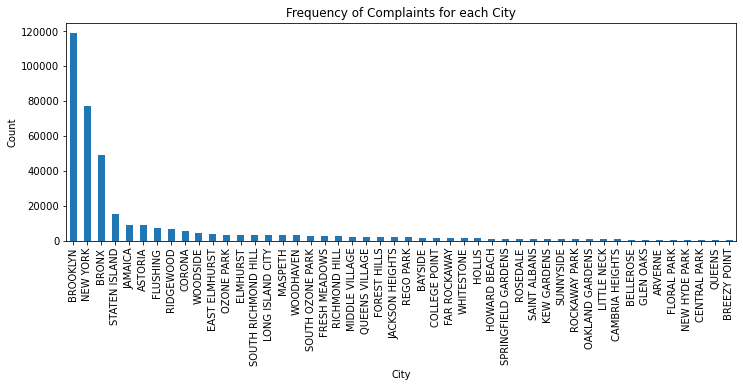

In [13]:
#complaints for each city
#frequency plot of complaints using matplotlib
df['City'].value_counts().plot.bar(title ="Frequency of Complaints for each City",xlabel="City",ylabel="Count",figsize = (12, 4))

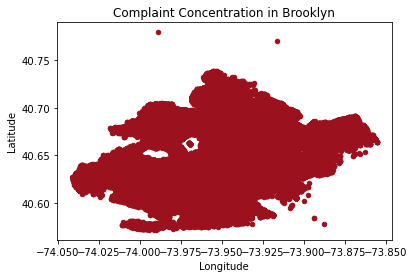

In [14]:
#get dataframe of just brooklyn
df_brooklyn=df[df['City'] == "BROOKLYN"]
#plot scatterplot of complaint concentration in brooklyn using matplotlib
df_brooklyn[['Longitude', 'Latitude']].plot(kind = 'scatter', x='Longitude', y='Latitude', title = 'Complaint Concentration in Brooklyn', color="#9b111e");

Text(0.5, 0.98, 'Complaint Concentration in Brooklyn')

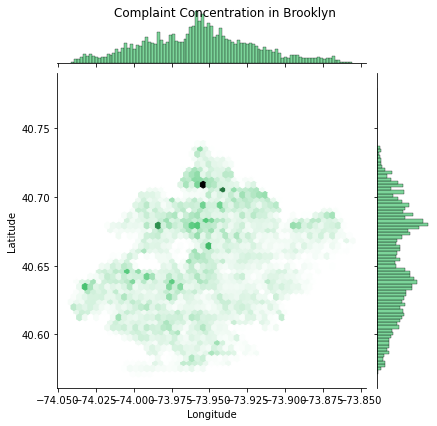

In [15]:
#plot hexbin plot of complaint concentration in brooklyn using seaborn
sns.jointplot(x=df_brooklyn["Longitude"], y=df_brooklyn["Latitude"], kind="hex", color="#50C878").fig.suptitle("Complaint Concentration in Brooklyn")

<AxesSubplot:title={'center':'Frequency of Complaints'}, xlabel='Complaint Type', ylabel='Frequency'>

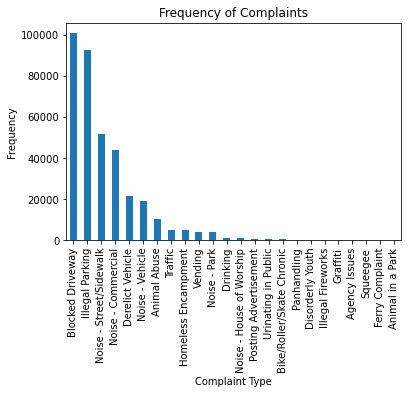

In [16]:
#frequency plot of complaints using matplotlib
df['Complaint Type'].value_counts().plot.bar(title ="Frequency of Complaints",xlabel="Complaint Type",ylabel="Frequency")

In [17]:
#top 10 complaints
df['Complaint Type'].value_counts().head(10)

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

In [18]:
#most common complaints in each city
df.groupby('City')['Complaint Type'].value_counts().groupby('City').head(1)

City                 Complaint Type         
ARVERNE              Illegal Parking               62
ASTORIA              Blocked Driveway            3595
BAYSIDE              Illegal Parking              638
BELLEROSE            Blocked Driveway             138
BREEZY POINT         Illegal Parking               16
BRONX                Blocked Driveway           17063
BROOKLYN             Blocked Driveway           36447
CAMBRIA HEIGHTS      Blocked Driveway             177
CENTRAL PARK         Noise - Street/Sidewalk      105
COLLEGE POINT        Blocked Driveway             597
CORONA               Blocked Driveway            3597
EAST ELMHURST        Blocked Driveway            1925
ELMHURST             Blocked Driveway            1992
FAR ROCKAWAY         Blocked Driveway             383
FLORAL PARK          Derelict Vehicle              74
FLUSHING             Blocked Driveway            3641
FOREST HILLS         Blocked Driveway             873
FRESH MEADOWS        Illegal Parking 

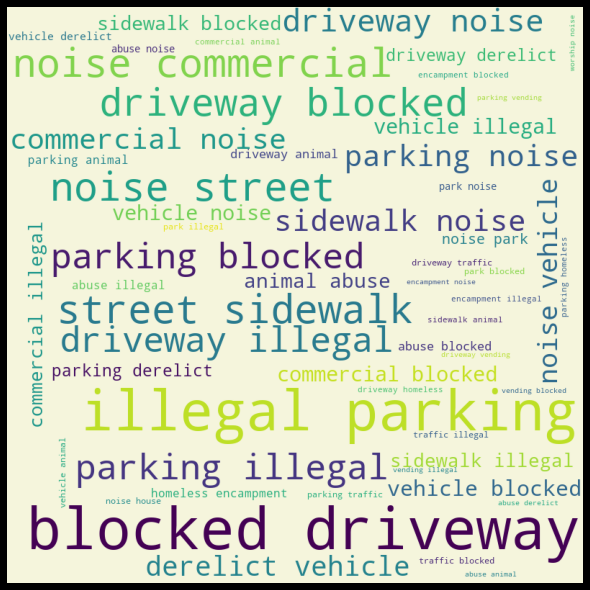

In [19]:
#let's visualize the major types of complaints in brooklyn, but instead of just doing another bar chart, we can make it interesting by using a wordcloud
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in df_brooklyn["Complaint Type"]:
    #cast value to string
    val = str(val)
    #split value
    tokens = val.split()
    #convert each token to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='#F5F5DC',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
#plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = "black")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [20]:
#create new time difference col and request closing time col so we can explore average response time
df["Time Difference"] = df['Closed Date'] - df['Created Date']
df["Request Closing Time"] = (df["Time Difference"].astype('timedelta64[s]'))/(60*60) #in hrs

In [21]:
#check dataframe
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Time Difference,Request Closing Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30,0.925000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13,1.453611
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34,4.859444
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27,7.757500
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44,3.462222


<AxesSubplot:title={'center':'Average Request Closing Time vs Complaint Type'}, xlabel='Complaint Type', ylabel='Time (hr)'>

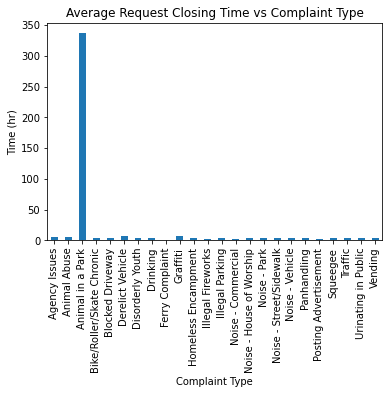

In [22]:
#plot average time it takes to close request per type using matplotlib
df.groupby("Complaint Type")["Request Closing Time"].mean().plot.bar(title ="Average Request Closing Time vs Complaint Type",xlabel="Complaint Type",ylabel="Time (hr)")

<AxesSubplot:title={'center':'Average Request Closing Time vs Complaint Type'}, xlabel='Complaint Type', ylabel='Time (hr)'>

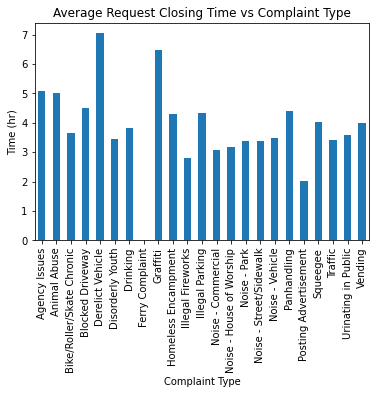

In [23]:
#animal in a park seems like an outlier, let's remove it and view the barplot after removing the outlier
df.loc[df["Complaint Type"] != "Animal in a Park"].groupby("Complaint Type")["Request Closing Time"].mean().plot.bar(title ="Average Request Closing Time vs Complaint Type",xlabel="Complaint Type",ylabel="Time (hr)")
#if we remove the animal in park outlier, we can see that derelict vehicle and graffitti take the longest

<AxesSubplot:title={'center':'Average Request Closing Time vs Complaint Type'}, xlabel='Complaint Type', ylabel='Time (hr)'>

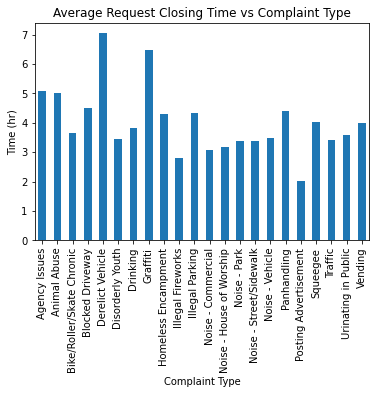

In [24]:
#exclude animal in a park and ferry complaint
df2=df[(df["Complaint Type"] != "Animal in a Park")  & (df["Complaint Type"] != "Ferry Complaint")].copy()
df2.groupby("Complaint Type")["Request Closing Time"].mean().plot.bar(title ="Average Request Closing Time vs Complaint Type",xlabel="Complaint Type",ylabel="Time (hr)")

In [25]:
#is the complaint type related to the location in df2?
#h0: there is no relation between complaint type and location
#h1: there is a relation between complaint type and location
ContingencyTable=pd.crosstab(index=df2['Complaint Type'],columns=df2['Location'])
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(ContingencyTable)
ChiSqResult[1]
#since p<0.05, we reject the null hypothesis and conclude that there is a relation between complaint type and location

0.0

In [26]:
#is there a difference in average request closing time in df2?
#anova hypothesis
#h0: there is no difference in average request closing time among the complaint types
#h1: at least one complaint type differs significantly in average request closing time
import statsmodels.api as sm
from statsmodels.formula.api import ols
#ols model
model = ols("Q('Request Closing Time') ~ Q('Complaint Type')", data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
#since p<0.05, we reject the null hypothesis and conclude that at least one complaint type differs significantly in average request closing time

,sum_sq,df,F,PR(>F)
Q('Complaint Type'),3.024905e+05,21.0,433.574685,0.0
Residual,1.203156e+07,362154.0,NaN,NaN


In [27]:
#create a month column to use in excel pivot table
df2['Created Month']=pd.DatetimeIndex(df2['Created Date']).month
df2.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Time Difference,Request Closing Time,Created Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30,0.925000,12
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13,1.453611,12
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34,4.859444,12
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27,7.757500,12
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44,3.462222,12


In [28]:
#export df2 to use in r, tableau, power bi, excel
df2.to_csv('df2.csv')